<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_AMLlab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical Clustering**

Given a online shoppers purchasing intention dataset, dataset captures various aspects of online shoppers behaviour and website interactions aiming to predict the visit results in a revenue.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster


Data Preprocessing

In [2]:
shoppers_data = pd.read_csv('/content/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Inference:**  The dataset consists of 10 numerical and 8 categorical columns, Revenue attribute can be used as class variable

In [4]:
shoppers_data.shape

(12330, 18)

In [5]:
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Checking the distributions of customers on revenue

<ipython-input-10-93d917e1e3ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=shoppers_data, palette='viridis')


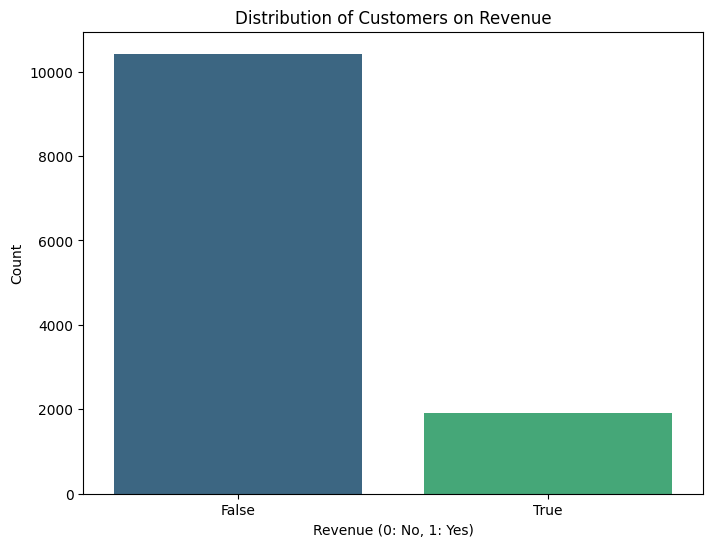

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=shoppers_data, palette='viridis')
plt.title('Distribution of Customers on Revenue')
plt.xlabel('Revenue (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

Distributions of customers on weekend

<ipython-input-12-19f49c799ee6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekend', data=shoppers_data, palette='viridis')


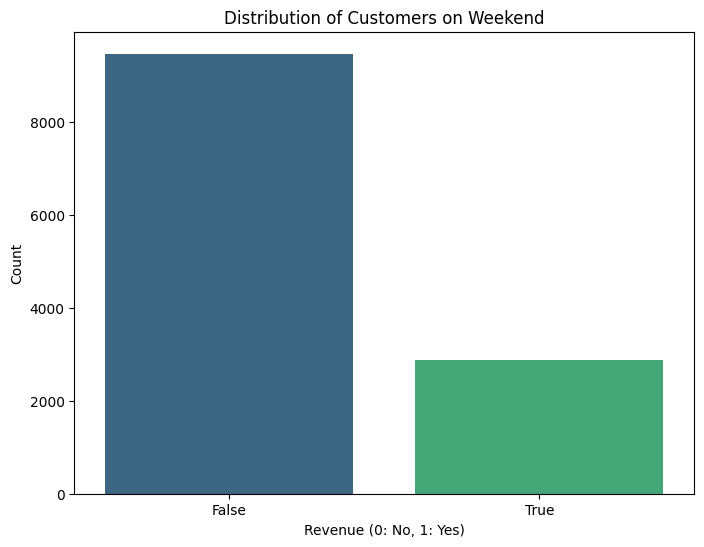

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weekend', data=shoppers_data, palette='viridis')
plt.title('Distribution of Customers on Weekend')
plt.xlabel('Revenue (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [14]:
shoppers_data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [18]:
shoppers_data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Plotting the pie chart for browsers

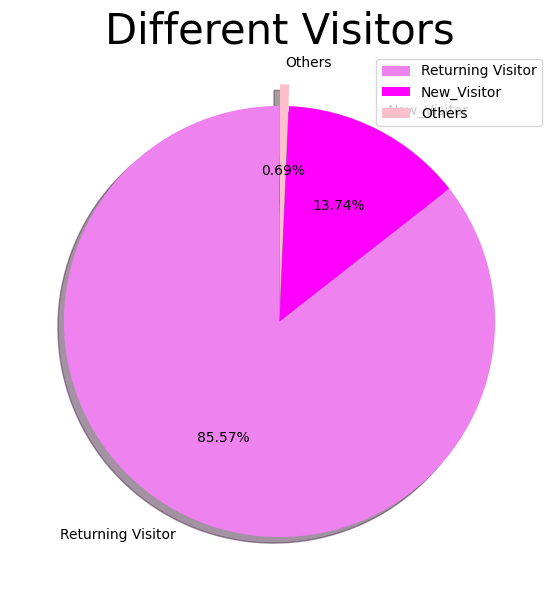

In [16]:
plt.rcParams['figure.figsize'] = (18,7)
size = [10551,1694,85]
colors = ['violet','magenta','pink']
labels = "Returning Visitor","New_Visitor","Others"
explode = [0,0,0.1]
plt.subplot(1,2,1)
plt.pie(size,colors=colors,labels=labels,explode = explode,shadow = True,autopct = '%.2f%%', startangle = 90)
plt.title('Different Visitors',fontsize=30)
plt.axis('off')
plt.legend()

Pie chart for different browsers

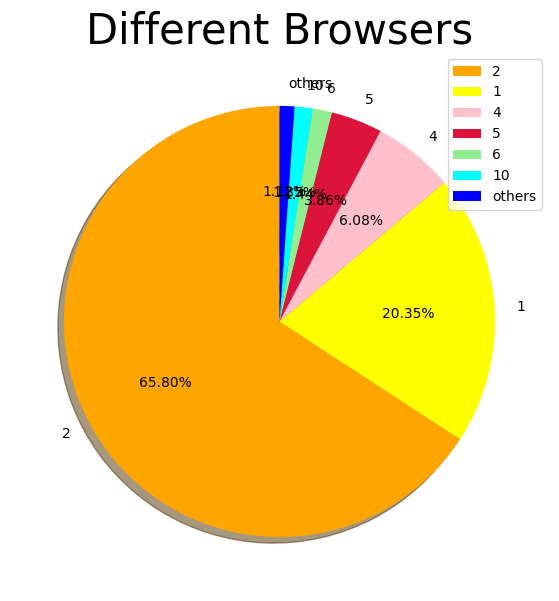

In [19]:
size = [7961, 2462, 736, 467,174, 163, 135]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Circle Graph for plotting the different number of Oses users have

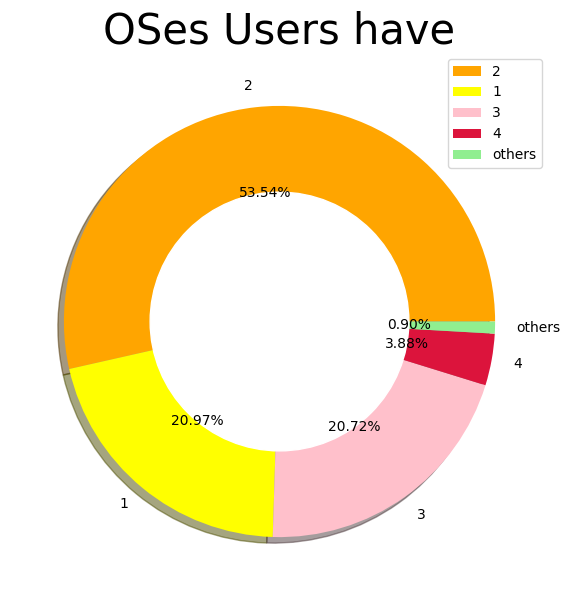

In [20]:
size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

Plotting special days

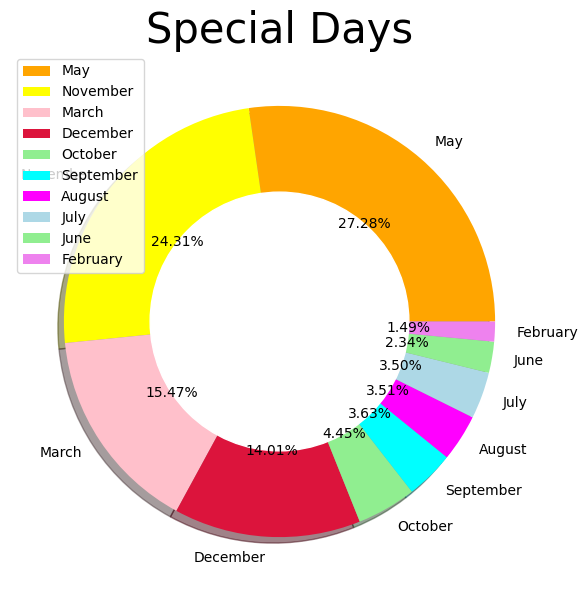

In [21]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

K means Clustering

In [24]:
X = shoppers_data.drop(['Month','VisitorType','Weekend','Revenue'],axis=1) # Excluding non numeric coloumns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Using the elbow method to find the optimal nmber of clusters

In [26]:
inertia = []
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X_scaled,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

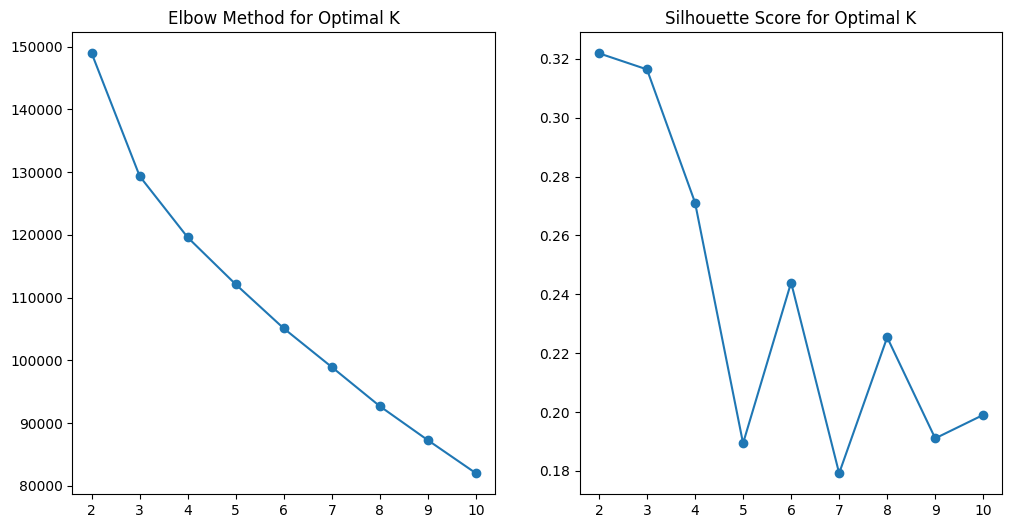

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(2,11),inertia,marker='o')
plt.title('Elbow Method for Optimal K')

plt.subplot(1,2,2)
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [38]:
optimal_k = 3
kmean = KMeans(n_clusters=optimal_k,random_state=42)
shoppers_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
print(f"Silhouette Score for KMeans: {silhouette_score(X_scaled, shoppers_data['KMeans_Cluster'])}")


Silhouette Score for KMeans: 0.19900744144846522


**Inference:** It indicates that the instances within each cluster are somewhat well matched to each other and somewhat poorly matched to instances in neighboring clusters.

Hierachical Clustering

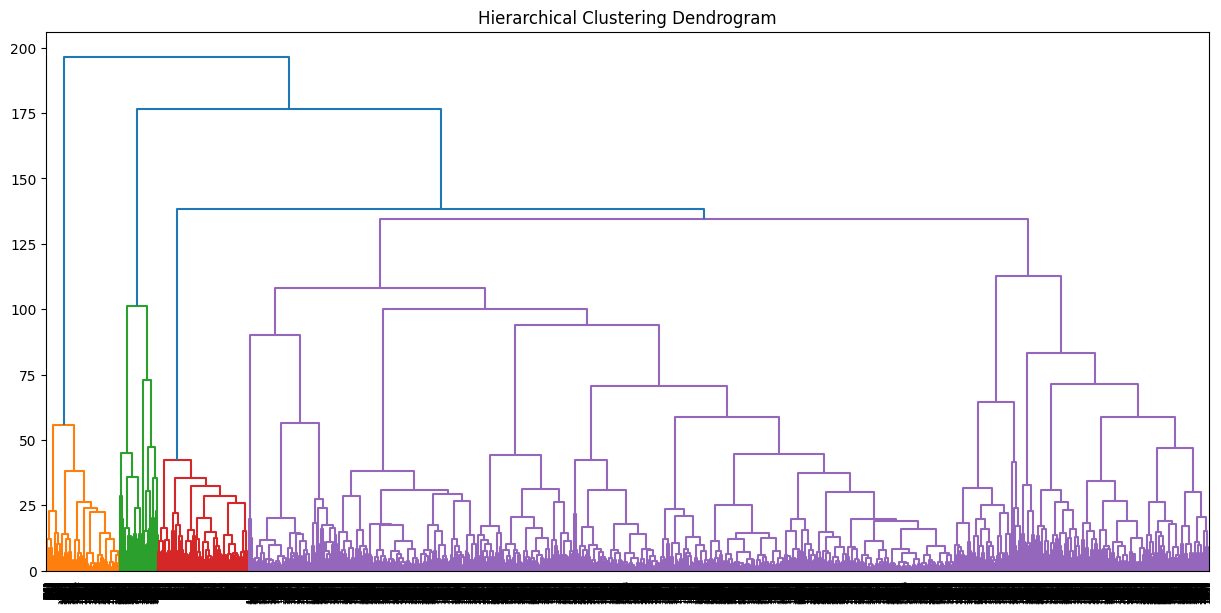

In [46]:
linkage_matrix = linkage(X_scaled,method='ward')
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Evaluating Hierarchical Clustering

In [53]:
height = 150

hierarchical_labels = fcluster(linkage_matrix,height,criterion='distance')
silhouette_hierarchical = silhouette_score(X_scaled,hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")

Silhouette Score for Hierarchical Clustering: 0.3464382264425998


**Inference:** Hierarchical clustering indicates that there is a moderate separation between the formed clusters